# <center> Solving Coupled ODEs using SciPy

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt 
#from matplotlib import pyplot as plt   # This is alternative way of calling the pyplot module of matplotlib library
from scipy.integrate import solve_ivp   # To solve ordinary differential equations
import matplotlib.animation as animation   # animated plots
from matplotlib.animation import FuncAnimation   

### Solve_ivp 
Scipy library of Python offers versatile numerical methods to solve ordinary differential equations. *Solve_ivp* is one of them to numerically integrate the ordinary differential equations. It can not only solve any order of linear differential equations, but can be extended to solve non-linear differential equations. 
*Solve_ivp* takes the *system* of first order differential equations, therefore the method to work it is always important to transform any second or higher order different equation into system of first order equations.

Suppose a system of thre  coupled differential equation given as
$$y_1' = a_{11}y_1 + a_{12}y_2 + a_{13}y_3 + b1$$
$$y_2' = a_{21}y_1 + a_{22}y_2 + a_{23}y_3 + b2$$
$$y_3' = a_{31}y_1 + a_{32}y_2 + a_{33}y_3 + b3$$


It can be written in matrix form which can then be solved numerically given the initial conditions using python.
$$\begin{pmatrix}
y_1'\\  y_2' \\ y_3' \end{pmatrix} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\a_{21} & a_{22} & a_{23}\\a_{31} & a_{32} & a_{33} \end{pmatrix} \begin{pmatrix}
y_1\\  y_2 \\ y_3 \end{pmatrix} + \begin{pmatrix} b_1\\  b_2 \\ b_3 \end{pmatrix} $$

where $y_1, y_2$ and $y_3$ are dependent on $t$, and $t$ is independent variable. To solve this system we express the right side of above equation as a system of equations *S* such that 
$$S = f(y_1, y_2, y_3)$$
Since
$$\frac{dS}{dt} = f(t, y_1, y_2, y_3) $$
Therefore

$$ \frac{dS}{dt} = f(t, S) $$
We implement this scheme to solve some often used second order differential equations in Physics.

### Example 1: Motion of a mass attached to a spring- horizontally
Suppose an object attached to a spring is oscillating in x-direction. According to Hook's law following second order differential equation describes its motion
$$ \vec{F} = -k \vec{x}$$
$$ \frac{d^2x}{dt^2} = -\frac{k}{m}x $$
First we write the above second order differential equation into system of two linear equations i.e.,
$$\frac{dx}{dt} = v $$
$$a = \frac{dv}{dt} = -\frac{k}{m}x$$

In [83]:
k = 2.5   # spring constant
m = 0.5    # mass of the object attached to the spring
def dSdt(t, s):      # defining function consisting of system of equations using notion of s
    x, v = s
    return [v,
            -(k/m)*x]
t_0 = 0                        # intial time
x_0 = 2                        # intial position 
v_0 = 0                        # initial velocity
s_0 = [x_0, v_0]               # over all initial state of the system

Another way to write the system of equations is also given below. The primary difference is that in second method one can write governing equations directly inside the function and get the desired variables using the *return*.

In [86]:
k = 2.5   # spring constant
m = 0.5    # mass of the object attached to the spring (the frequency of oscillation depends on both k and m)
def dSdt(t, s):      # declaring the function using notation of S
    x, v = s
    a = -(k/m)*x
    return [v, a]
t_0 = 0                        # intial conditions
x_0 = 2                        # intial position 
v_0 = 0                        # initial velocity
s_0 = [x_0, v_0]               # Initial state of the system

In [87]:
t = np.linspace(0, 5, 100)     # time array (independent variable)
sol = solve_ivp(dSdt, [0, 10], y0 = s_0, t_eval = t)   # numerical integration using solve_ivp

In [88]:
x_sol = sol.y[0]
v_sol = sol.y[1]

In [ ]:
%matplotlib qt5      # To plot outside of Jupyter notebook

In [56]:
%matplotlib notebook   

<IPython.core.display.Javascript object>


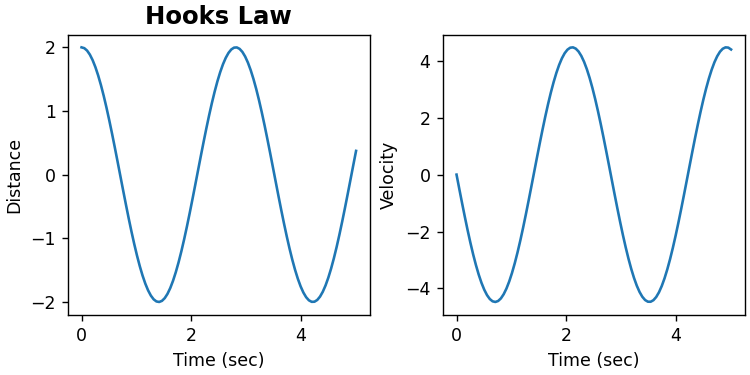

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 3), constrained_layout=True)
ax1.plot(t, x_sol)
ax2.plot(t, v_sol)
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Distance')
ax2.set_xlabel('Time (sec)')
ax2.set_ylabel('Velocity')
ax1.set_title('Hooks Law', fontsize = 14, fontweight = 'bold');plt.show()

Animation of the motion of object attached to a spring

<IPython.core.display.Javascript object>


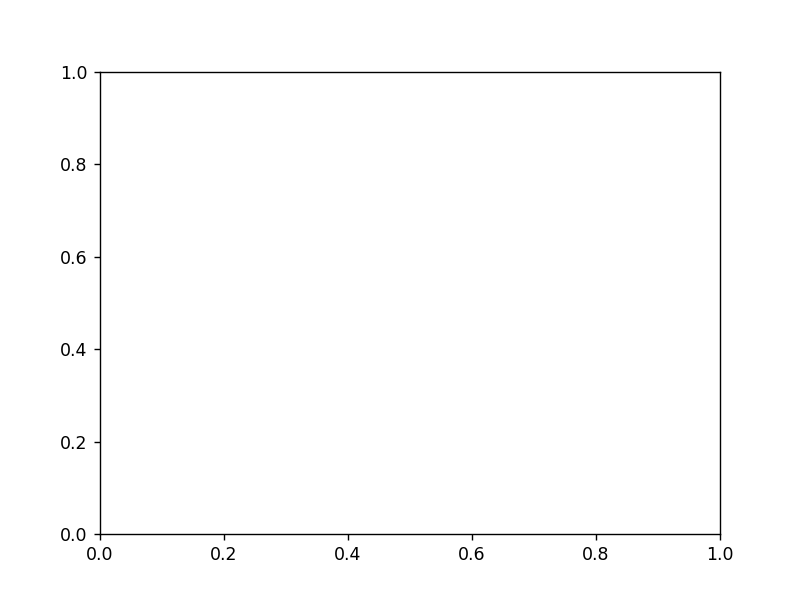

In [90]:
fig, ax = plt.subplots()
lin = ax.plot([], [], 'o')
q = ax.quiver(x_sol[0], 1.5, x_sol[0], 0)
ax.set_xlim([-3, 3])
ax.set_ylim([-1, 2])
ax.set_xlabel('Distance(m)');ax.set_ylabel('Distance(m)')

def hook_law(i):
    plt.cla()
    
    ax.plot(x_sol[i], 0, 'o')
    ax.quiver(x_sol[i], 1.5, x_sol[i], 0, scale = 15, color = 'red')
    ax.quiver(x_sol[i], 1.3, v_sol[i], 0, scale = 30, color = 'blue')
    ax.set_title('SHM- Displacement and Velocity vectors')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-1, 2])
    
anm = FuncAnimation(fig, hook_law, frames = 500, interval = 100, repeat = 'False')  # keep highest number of frames
#anm.save('Hooks law.mp4', dpi = 150, fps = 30, writer = 'ffmpeg')     # to save the animation

### Example 1b: Vertical motion of a mass attached to a spring
Now we consider that mass attached to spring is oscillating vertically then the differential equation describing its motion would take the form
$$ \frac{d^2x}{dt^2} = -\frac{k}{m}x -g$$
First we write the above second order differential equation into system of two linear equations i.e.,
$$\frac{dx}{dt} = v $$
$$\frac{dv}{dt} = -\frac{k}{m}x - g$$

In [91]:
k = 3   # spring constant
m = 1    # mass of the object attached to the spring
g = 10
def dSdt(t, s):      # defining function for system of equations
    x, v = s
    return [v,
            -(k/m)*x - g]
t_0 = 0                        # starting time
x_0 = 2                        # intial position of mass 
v_0 = 0                        # initial velocity
s_0 = [x_0, v_0]               # Initial state of the system

In [92]:
t = np.linspace(0, 10, 1000)     # time array (independent variable)
sol = solve_ivp(dSdt, [0, 10], y0 = s_0, t_eval = t)   # ODE solver
x_sol = sol.y[0]
v_sol = sol.y[1]

<IPython.core.display.Javascript object>


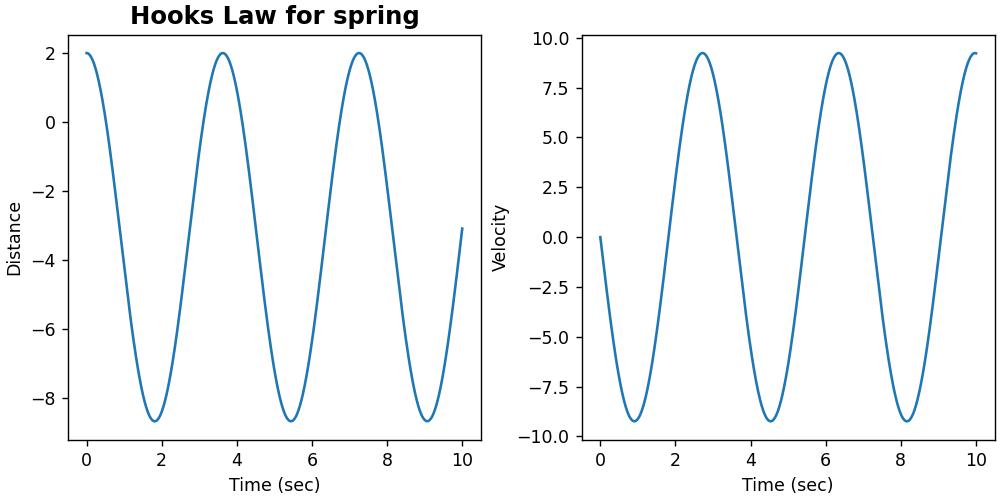

Text(0.5, 1.0, 'Hooks Law for spring')

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), constrained_layout=True) # plotting graphs
ax1.plot(t, x_sol)
ax2.plot(t, v_sol)
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Distance')
ax2.set_xlabel('Time (sec)')
ax2.set_ylabel('Velocity')
ax1.set_title('Hooks Law for spring', fontsize = 14, fontweight = 'bold')

### Example 2: Damped harmonic oscillations
Solve the following damped harmonic oscillator equation.
$$ mx'' +b x' + k x  = 0$$
Sine it is second order differential equation therefore the system would of two linear differential equations.
$$ x' = v $$ \
$$ v' = -\frac{bv}{m} - \frac{kx}{m} $$

In [14]:
m = 1
k = 3
b = 1  # damping coefficient

In [15]:
t = np.linspace(0, 10, 100)
def dSdt(t, s):
    x, v = s
    return [v,
            -(b*v/m) -k*x/m]
t_0 = 0
x_0 = 2
v_0 = 0
s_0 = [x_0, v_0]

In [16]:
sol = solve_ivp(dSdt, [0, 10], y0 = s_0, t_eval = t)
x_sol = sol.y[0]
v_sol = sol.y[1]

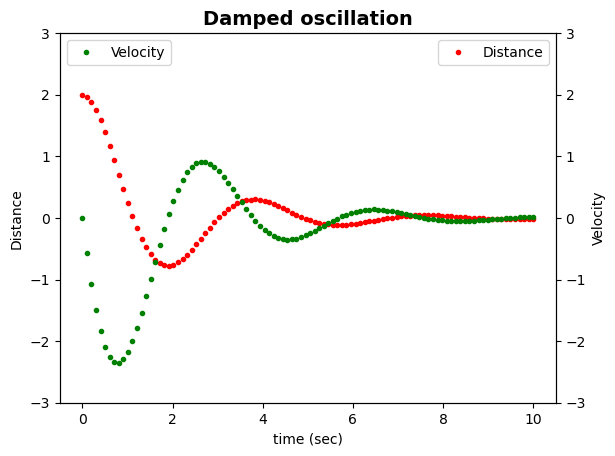

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t, x_sol, 'r.', label = 'Distance')
ax.set_ylim([-3, 3])
ax.set_ylabel('Distance')
ax.set_title('Damped oscillations', fontsize = 14, fontweight = 'bold')
ax2 = ax.twinx()

ax2.plot(t, v_sol, 'g.', label = 'Velocity')
ax.set_xlabel('time (sec)')
ax2.set_ylim([-3, 3])
ax2.set_ylabel('Velocity')
ax.legend(loc = 0); ax2.legend(loc = 2)

### Example 3 (RLC Circuit damped, Oscillating Current)
Consider an electroinc circuit consisting of an inductor, capacitor and resistor. Intially, at t=0, the capacitor is charged given by $q_0$ and voltage $v_0$. When the switch is closed a current($i$) flow through the cricuit. According to Kirchoff's voltage law the sume of all voltages around a loop is always zero
$$ V_c -V_R - V_L = 0 $$
Noting $ i = -\frac{dq}{dt}$ and using voltage formula for each of the component, following differential equation can be obtained
$$ q'' + \frac{Rq'}{L} + \frac{q}{LC} = 0 $$
Which corresponds to these two coupled linear differential equations;
$$ q' = i$$ \
$$ i' = - \frac{Ri}{L} - \frac{q}{LC} $$

In [35]:
R = 1      # resistance
L = 1      # inductance
C = 0.2    # capacitance

In [36]:
def dSdt(t, s):       # Defining a function as system of equations
    q, i = s
    return [i,
            -(R*i/L) - (q/(L*C))]
t_0 = 0
q_0 = 10
i_0 = 0
s_0 = [q_0, i_0]

In [37]:
t = np.linspace(0, 10, 1000)
sol = solve_ivp(dSdt, [0, 10], y0 = s_0, t_eval = t)
q_sol = sol.y[0]
i_sol = sol.y[1]

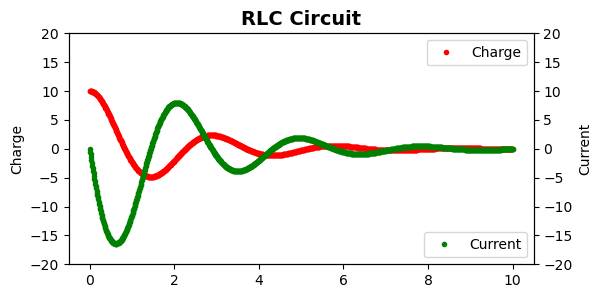

In [40]:
fig = plt.figure(figsize = (6, 3))
ax1 = fig.add_subplot()
ax1.plot(t, q_sol, 'r.', label = 'Charge')
ax1.set_ylim([-20, 20])
ax1.set_ylabel('Charge')
ax1.set_title('RLC Circuit', fontsize = 14, fontweight = 'bold')
ax2 = ax1.twinx()

ax2.plot(t, i_sol, 'g.', label = 'Current')
ax.set_xlabel('time (sec)')
ax2.set_ylim([-20, 20])
ax2.set_ylabel('Current')
ax1.legend(loc = 0); ax2.legend(loc = 4)

### Example 3b: LC Circuit current oscillations
Without a resistor the same ciruit shows undamped oscillations i.e., the amplitude of current does not decaly with time.
$$ V_c - V_L = 0 $$
It would reduce into following second order differential equation
$$ q'' + \frac{q}{LC} = 0 $$
The two coupled linear differential equations are
$$ q' = i$$ \
$$ i' = - \frac{q}{LC} $$

In [45]:
L = 10**-1    # inductance 
C = 10**-2     # capacitance

In [46]:
def dSdt(t, s):
    q, i = s
    return [i,
            -q/(L*C)]
t_0 = 0
q_0 = 10
i_0 = 0
s_0 = [q_0, i_0]

In [47]:
t = np.linspace(0, 1, 100)
sol = solve_ivp(dSdt, [0, 1], y0 = s_0, t_eval = t)
q_sol = sol.y[0]
i_sol = sol.y[1]

Text(0.5, 1.0, 'LC Circuit')

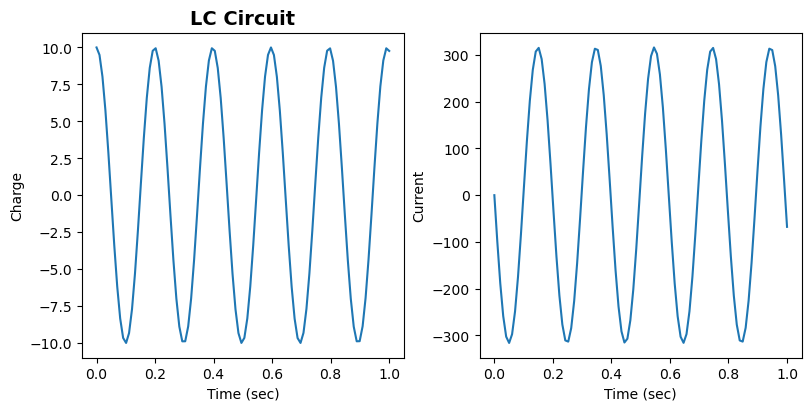

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)
ax1.plot(t, q_sol, label = 'charge')
ax2.plot(t, i_sol, label = 'current')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Charge')
ax2.set_xlabel('Time (sec)')
ax2.set_ylabel('Current')
ax1.set_title('LC Circuit', fontsize = 14, fontweight = 'bold')

### Example 4: Atmospheric pressure profile
The atmpsheric pressure decreases exponentially with altitude from the surface of Earth. The equation for change in pressure is given by;
$$ \frac{dp}{dy} = \rho(y)g $$
where $\rho$ is the density as function of altitude $y$. $\rho$ can be expressed in terms of pressure i.e.,

$$ \frac{dp}{dy} = -\frac{Mg}{RT}p $$
where $T$ is temperature and is also function of altitude, giving us a final equation
$$ \frac{dp}{dy} = -\frac{Mg}{R(293-\frac{y}{200})}p$$


In [66]:
# Parameters
M = 29
g = 10
R = 8.31

# defining system of equations

def dSdy(y, s):
    p = s
    return -((M*g)/(R*(293-y/200)) )*p

# initial conditions

y_0 = 0      # initial height
p_0 = 1000   # pressure at ground level
s_0 = [p_0]

In [67]:
y = np.linspace(0, 100, 100)
sol = solve_ivp(dSdy, [0, 100], y0 = s_0, t_eval = y)
p_sol = sol.y[0]

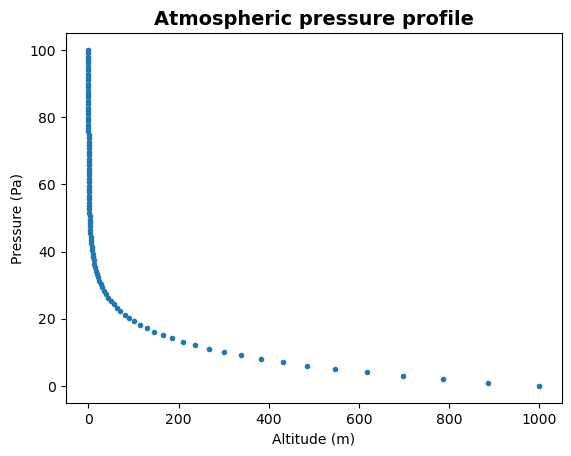

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(p_sol, y, '.', label = 'Distance')
ax.set_xlabel('Altitude (m)')
ax.set_ylabel('Pressure (Pa)')
ax.set_title('Atmospheric pressure profile', fontsize = 14, fontweight = 'bold');plt.show()

### Example 5- Free fall motion of an object inside a fluid
The motion of an object moving downwards inside a liquid under the influence of gravity. Object experiences three forces
1. Downward force due to gravity
2. Buoyancy force of liquid due to pressure in upward direction
3. Force opposite to velocity of object due to viscosity of fluid (leminar flow), also known as [Stokes' Law](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Classical_Mechanics_(Dourmashkin)/08%3A_Applications_of_Newtons_Second_Law/8.06%3A_Drag_Forces_in_Fluids) 

The equation of each force is given by

$$ F_{viscosity} = 6 \pi \eta r \vec{v} $$
$$ F_{gravity} = mg $$
$$ F_{buoyancy} = \rho_w V g $$

where $m$ and $V$ is mass and volume of the object, $\rho_w$ is density of water, and $r$ is the radius of ball. The resulting acceleration in presence of these forces acting on the ball would be
$$ma = mg - 6 \pi \eta r v - \rho_w V g$$

$$a = \frac{mg - 6 \pi \eta r v - \rho_w V g}{m}$$

A marble is falling through the oil, parameters are given below, compute the position and velocity of the marble.

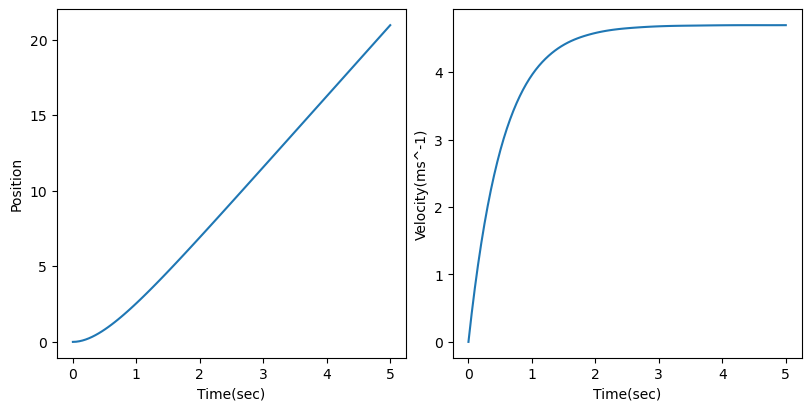

In [24]:
# Parameters

m = 0.00408  # mass of the object (kg)
g = 9.81  # acceleration due to gravity (m/s^2)
rho = 895.0  # density of the olive oil (kg/m^3)
eta = 0.08  # viscosity coefficient
r = 0.005  # radius of the sphere (m)
A = np.pi * r**2  # cross-sectional area of the sphere (m^2)
V = (4/3) * np.pi * r**3  # volume of the sphere (m^3)

# Initial conditions
x0 = 0.0  # initial position (m)
v0 = 0.0  # initial velocity (m/s)

# Function that computes the acceleration of the object
def acceleration(t, y):
    x, v = y
    Fb = rho * g * V  # buoyant force
    Fd = 6 * np.pi* eta * v * r  # drag force
    a = (m*g - Fb - Fd) / m  # acceleration
    return [v, a]

# Time span and time step
t = np.linspace(0, 5, 100)  # time span for the simulation (s)

# Solve the differential equation
sol = solve_ivp(acceleration, [0, 5], [x0, v0], t_eval= t)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)
ax1.plot(t, sol.y[0])
ax1.set_xlabel('Time(sec)'); ax1.set_ylabel('Position')
ax2.plot(t, sol.y[1])
ax2.set_xlabel('Time(sec)'); ax2.set_ylabel('Velocity(ms^-1)')
plt.show()


### Example 6: Projectile Motion
The two dimension motion of an object under the influence of gravity is called projectile motion. If an object has initial velocity $v_0$ at an angle $\theta$ then the velocity components along the trajectory are (ignoring the air drag);
$$ v_x = v_0 \cos(\theta) $$
$$ v_y = v_0 \sin(\theta) + gt$$
The above equations have been solved to compute the trajectory followed by the object. The system of equations would be
$$\frac{dx}{dt} = v_0 \cos(\theta) $$
$$\frac{dy}{dt} = v_0 \sin(\theta) + gt$$

In [34]:
g = -10
v_0 = 50
ang = 30 * np.pi/180         # Angle is in radians
v_x0 = v_0*np.cos(ang)
v_y0 = v_0*np.sin(ang)

In [35]:
def dSdt(t, s):
    x, y = s
    return [v_x0,
            v_y0 + g*t]
t_0 = 0
x_0 = 0
y_0 = 0
s_0 = [x_0, y_0]

In [36]:
t = np.linspace(0, 5, 100)
sol = solve_ivp(dSdt, [0, 5], y0 = s_0, t_eval = t)
x_sol = sol.y[0]
y_sol = sol.y[1]

<IPython.core.display.Javascript object>


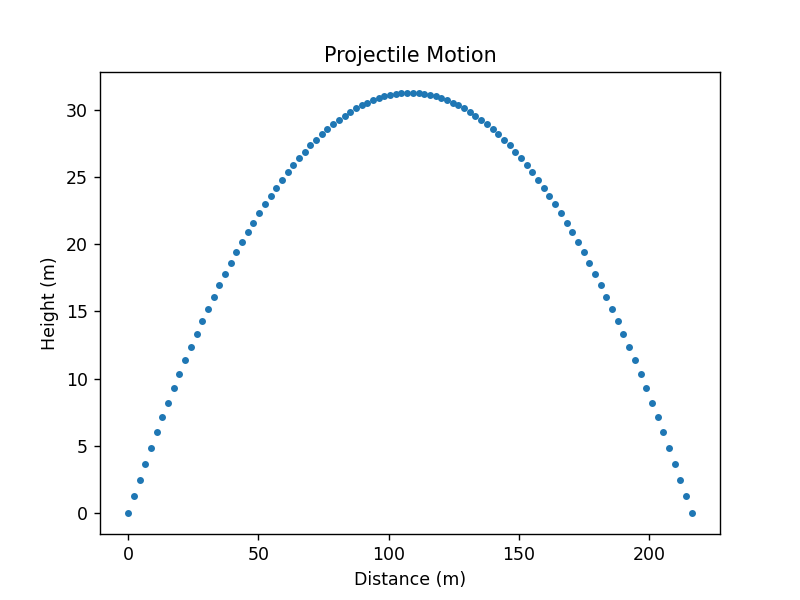

Text(0, 0.5, 'Height (m)')

In [37]:
fig, ax = plt.subplots()
ax.plot(x_sol, y_sol, '.', label = 'distnace')
ax.set_xlabel('Distance (m)')
ax.set_title('Projectile Motion')
ax.set_ylabel('Height (m)')

### Example 6b: Projectile motion with air drag
Now we consider the motion of the projectile in presence of air. The air drag acts as force on the projectile effecting its position and velocity. Air drag depends on the velocity of the projectile. In a laminar flow the drag force is given as 
$$F_d = -\alpha v$$
where $v$ is the velcity of the object and $\alpha$ is air drag coefficient. The net force would be
$$ F_{net} = mg - \alpha v $$

Newton's second law would reduce the above equation into following kinematics equations
$$ \frac{d^2y}{dt^2} = g - \frac{\alpha}{m}\frac{dy}{dt} $$ 

$$ \frac{d^2x}{dt^2} = -\alpha \frac{dy}{dt} $$

In [41]:
m = 0.5
alpha = 0.02
g = -10
v_0 = 50
ang = 30 * np.pi/180
v_x0 = v_0*np.cos(ang)
v_y0 = v_0*np.sin(ang)

In [42]:
def dSdt(t, s):
    x, vx, y, vy = s
    return [vx,
            -(alpha/m)*vx,
           vy,
           g - alpha*vy/m]
t_0 = 0
x_0 = 0
y_0 = 0
s_0 = [0, v_x0, 0, v_y0]

In [43]:
t = np.linspace(0, 5, 100)
sol = solve_ivp(dSdt, [0, 5], y0 = s_0, t_eval = t)

In [44]:
x_sol = sol.y[0]
vx_sol = sol.y[1]
y_sol = sol.y[2]
vy_sol = sol.y[3]

Text(0.5, 1.0, 'Projectile motion in air')

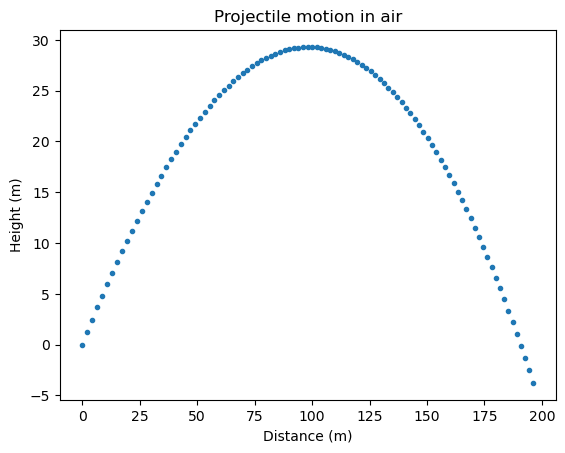

In [45]:
fig, ax = plt.subplots()
ax.plot(x_sol, y_sol,'.', label = 'distnace')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.set_title('Projectile motion in air')

### Example 7a- Motion of charge particle in magnetic field

The force experienced by a moving charge particle in a magnetic field is given by Lorentz Law;
$$\vec{F} = q(\vec{v} \times \vec{B}) $$
Using Newton's second Law of force the trajectory of the particle can be determined. Suppose magnetic field in z-direction the equations of motion can be reduced into;
$$ x'' = \frac{qB}{m} y' $$
$$ y'' = -\frac{qB}{m} x' $$
These can be transformed into following system of linear equations
$$ x' = u $$
$$ u' = wv $$
$$ y' = v $$
$$ v' = -wu$$
where $w = \frac{qB}{m}$


In [62]:
q = 10**-9
m = 10**-12
Bz = -0.5

In [63]:
def dSdt(t, s):
    x, y, vx, vy = s
    return [vx,
            vy,
            (q*Bz/m) * vy,
            -(q*Bz/m) * vx]

t_0 = 0
vx_0 = 500
vy_0 = 0
x_0 = 0
y_0 = 0
s_0 = [x_0, y_0, vx_0, vy_0]

In [64]:
t = np.linspace(0, 0.01, 100)
sol = solve_ivp(dSdt, [0, 0.01], y0 = s_0, t_eval = t)

In [65]:
x_sol = sol.y[0]
y_sol = sol.y[1]
vx_sol = sol.y[2]
vy_sol = sol.y[3]
v_mag = np.hypot(vx_sol, vy_sol)

<IPython.core.display.Javascript object>


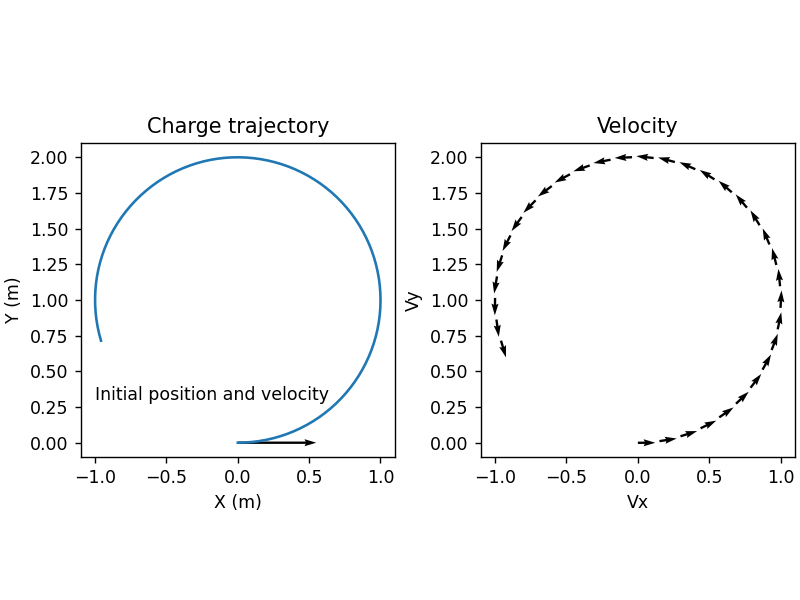

In [82]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].plot(x_sol, y_sol, label = 'distnace')
ax[1].quiver(x_sol[::3], y_sol[::3], vx_sol[::3], vy_sol[::3])
ax[0].set_xlabel('X (m)')
ax[0].set_ylabel('Y (m)')
ax[0].set_title('Charge trajectory')
ax[0].text(-1, 0.3, 'Initial position and velocity')
ax[0].quiver(x_0, y_0, vx_0, vy_0, scale = 2000)
ax[0].set_aspect('equal')
ax[1].set_xlabel('Vx')
ax[1].set_ylabel('Vy')
ax[1].set_title('Velocity')
ax[1].set_aspect('equal')

### Example 7b- Charge particle motion in Electric and Magnetic fields
Now we consider motion of charge particle when both electric and magnetic fields are present. It is given by Lorentz Law as follows
$$ \vec{F} = q~ (\vec{E} + \vec{v} \times \vec{B}) $$
Equations of motion are obtained using Newton's second Law

$$ x'' = \frac{q}{m} (E_x + V_y B_z - V_z B_z) $$
$$ y'' = \frac{q}{m} (E_y + V_z B_x - V_x B_z) $$
$$ z'' = \frac{q}{m} (E_z + V_x B_y - V_y B_x) $$

We again use *solve_ivp* to solve above system of coupled second order differential equations.

In [43]:
q = 10**-9
m = 10**-12
Bx = 0
By = 0
Bz = 0.5
Ex = 0
Ey = 100
Ez = 0

In [44]:
def dSdt(t, s):
    x, y, z, vx, vy, vz = s
    return [vx,
            vy,
            vz,
            (q/m) * (Ex + vy * Bz - vz * By),
            (q/m) * (Ey + vz * Bx - vx * Bz),
            (q/m) * (Ez + vx * By - vy * Bx)]

t_0 = 0
x_0 = 0
y_0 = 0
z_0 = 0
vx_0 = 500
vy_0 = 0
vz_0 = 0
s_0 = [x_0, y_0, z_0, vx_0, vy_0, vz_0]

In [45]:
t = np.linspace(0, 0.1, 1000)
sol = solve_ivp(dSdt, [0, 0.1], y0 = s_0, t_eval = t)
x_sol = sol.y[0]
y_sol = sol.y[1]
z_sol = sol.y[2]
vx_sol = sol.y[3]
vy_sol = sol.y[4]
vz_sol = sol.y[5]

<IPython.core.display.Javascript object>


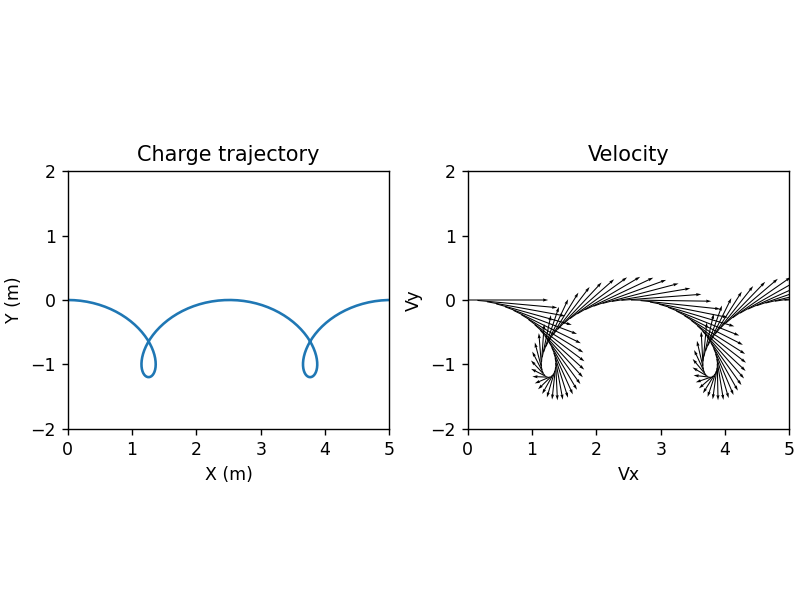

In [52]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].plot(x_sol, y_sol)
ax[1].quiver(x_sol[::3], y_sol[::3], vx_sol[::3], vy_sol[::3], scale = 2000)
ax[0].set_xlabel('X (m)')
ax[0].set_ylabel('Y (m)')
ax[0].set_xlim([0, 5])
ax[0].set_ylim([-2, 2])
ax[0].set_title('Charge trajectory')
ax[0].set_aspect('equal')
ax[1].set_xlabel('Vx')
ax[1].set_ylabel('Vy')
ax[1].set_ylim([-2, 2])
ax[1].set_title('Velocity')
ax[1].set_xlim([0, 5])
ax[1].set_aspect('equal')

### Example 8 - Trajectory of two objects using Newton's Law of gravitation
According to Newton's Law of Gravitation two masses, $m_1$ and $m_2$, experiences mutual force of attraction. The force exerted by $m_2$ on $m_1$ is given by
$$ \vec{F_{12}} = \frac{G m_1 m_2}{{|r_{12}|}^2} \hat {r_{12}} $$
In vector notation
$$ \vec{F_{12}} = \frac{G m_1 m_2}{{|r_{12}|}^{1.5}} \hat {r_{12}} $$
The equations of kinematics can be expressed for both masses given as
$$ x_1'' = \frac{G m_2}{((x_2 -x_1)^2 + (y_2 -y_1)^2)^{1.5}} x_1 $$
$$ y_1'' = \frac{G m_2}{((x_2 -x_1)^2 + (y_2 -y_1)^2)^{1.5}} y_1 $$
$$ x_2'' = \frac{G m_1}{((x_1 -x_2)^2 + (y_1 -y_2)^2)^{1.5}} x_2 $$
$$ y_2'' = \frac{G m_1}{((x_1 -x_2)^2 + (y_1 -y_2)^2)^{1.5}} y_2 $$

The system of above equations is solved to find trajectories and velocities of both masses.

In [47]:
G = 6.67 # constant of gravitation
m1 = 1   # mass of one body
m2 = 200    # mass of another body

In [48]:
def dSdt(t, s):           # system of equations using python function
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = s
    return [vx1,
            vy1,
            vx2,
            vy2,
            G * m2 * (x2-x1) / (((x2-x1)**2 + (y2-y1)**2)**1.5),
            G * m2 * (y2-y1) / (((x2-x1)**2 + (y2-y1)**2)**1.5),
            G * m1 * (x1-x2)  / (((x1-x2)**2 + (y1-y2)**2)**1.5),
            G * m1 * (y1-y2) / (((x1-x2)**2 + (y1-y2)**2)**1.5)]

t_0 = 0              # initial time
x1_0 = 2             # initial x-position of m1
y1_0 = 3             # initial y-position of m1
x2_0 = 0             # initial x-position of m2
y2_0 = 0             # initial y-position of m2
vx1_0 = 20           # initial x component of velocity of m1
vy1_0 = 0            # initial y component of velocity of m1
vx2_0 = 0            # initial x component of velocity of m2
vy2_0 = 0            # initial y component of velocity of m2

s_0 = [x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0]   # system of initial conditions

In [49]:
t = np.linspace(0, 2, 100)      # time array
sol = solve_ivp(dSdt, [0, 2], y0 = s_0, t_eval = t)      # numerical integration using solve_ivp

In [50]:
sol_x1 = sol.y[0]
sol_y1 = sol.y[1]
sol_x2 = sol.y[2]
sol_y2 = sol.y[3]
sol_vx1 = sol.y[4]
sol_vy1 = sol.y[5]
sol_vx2 = sol.y[6]
sol_vy2 = sol.y[7]

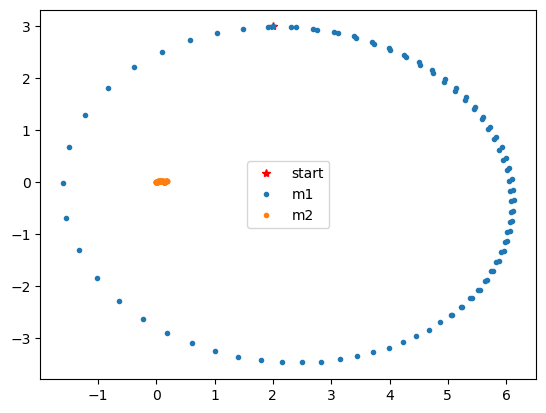

In [51]:
fig, ax = plt.subplots()
ax.plot(2, 3, '*r', label = 'start')
ax.plot(sol_x1, sol_y1, '.', label = 'm1')
ax.plot(sol_x2, sol_y2, '.', label = 'm2')
ax.legend()

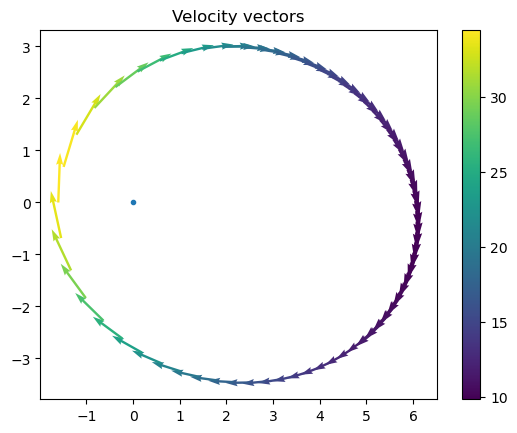

In [52]:
v1_mag = np.hypot(sol_vx1, sol_vy1)
fig, ax = plt.subplots()
c = ax.quiver(sol_x1, sol_y1, sol_vx1, sol_vy1, v1_mag)
ax.plot(sol_x2[0], sol_y2[0], '.', label = 'm2')
ax.set_title('Velocity vectors')
fig.colorbar(c)

<IPython.core.display.Javascript object>


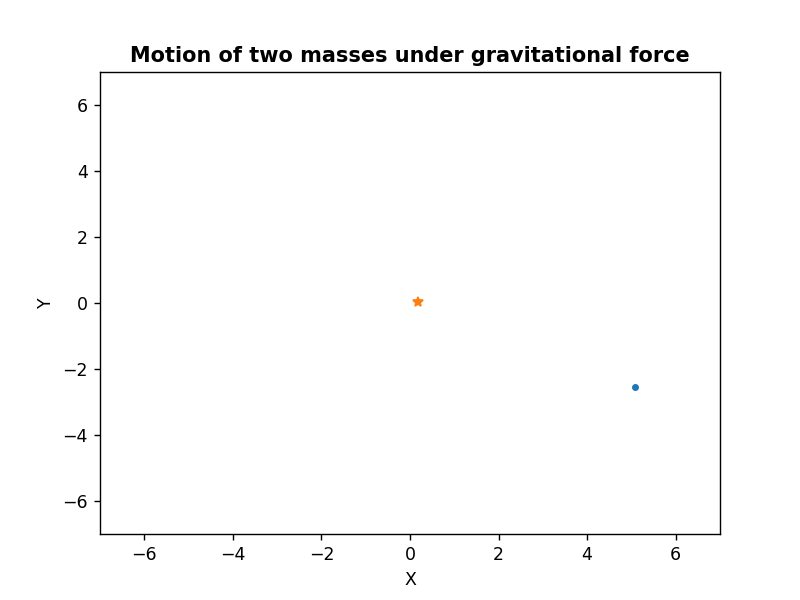

In [59]:
fig, ax = plt.subplots()
dot1, = ax.plot([], [], '.')
dot2, = ax.plot([], [], '*')
# quiver1 = ax.quiver(sol_x1[i], sol_y1[i], sol_vx1[i], sol_vy1[i], v1_mag[i])
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Motion of two masses under gravitational force', fontweight = 'bold')


def animate(i):
    dot1.set_data(sol_x1[i], sol_y1[i])
    dot2.set_data(sol_x2[i], sol_y2[i])
    #ax.quiver(sol_x1[i], sol_y1[i], sol_vx1[i], sol_vy1[i], v1_mag[i])
    
ani = FuncAnimation(fig, animate, frames=500, interval=200)

### <center> The End